<center><h1 style="color:red;">Abstract</h1></center><br><br>
<center><h1 style="color:red;">Restaurants Recommendation System  </h1></center><br><br>
<b>
The dataset is obtained from a recommender system prototype from UCI Machine Learning
Repository of Restaurant and Consumer data Data Set. The task is to generate a top-n list of
restaurants according to the consumer preferences.
We can simply say that Recommendation engines are nothing but just an automated form of a
person who is sitting at shop counter and predict about customer on the basis of their previous
experience or customer choice. If customer ask him for a product then he not only to show that
product, but also the related ones which you could buy. They are well trained in cross selling and up
selling. So, does our recommendation engines.
The ability of these engines to recommend personalized content, based on past behavior is
incredible. It brings customer delight and gives them a reason to keep returning to the website. In
this post, I will cover the fundamentals of creating a recommendation system using in Python. I will
get some intuition into how recommendation work and create basic popularity model and a
collaborative filtering model</b>
<b><br><br>
Two approaches were tested:<br> a collaborative filter technique and a contextual approach.<br>
   (i) The collaborative filter technique used only one file i.e., rating_final.csv that comprises the user, item and rating attributes. <br>
   (ii) The contextual approach generated the recommendations using the remaining eight data files.</b>
<b>
<pre>
Files, instances and attributes
Number of Files: 9

Restaurants
1 chefmozaccepts.csv
2 chefmozcuisine.csv
3 chefmozhours4.csv
4 chefmozparking.csv
5 geoplaces2.csv

Consumers
6 usercuisine.csv
7 userpayment.csv
8 userprofile.csv

User-Item-Rating
9 rating_final.csv
</b>
</pre>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
%matplotlib inline

In [2]:
chefmozaccepts_df=pd.read_csv('RCdata/chefmozaccepts.csv')
chefmozcuisine_df=pd.read_csv('RCdata/chefmozcuisine.csv')
chefmozhours4_df=pd.read_csv('RCdata/chefmozhours4.csv')
chefmozparking_df=pd.read_csv('RCdata/chefmozparking.csv')
geoplaces2_df=pd.read_csv('RCdata/geoplaces2.csv',encoding='latin-1')
rating_final_df=pd.read_csv('RCdata/rating_final.csv')

usercuisine_df=pd.read_csv('RCdata/usercuisine.csv')
userpayment_df=pd.read_csv('RCdata/userpayment.csv')
userprofile_df=pd.read_csv('RCdata/userprofile.csv')

### Explore the Restaurent files
#### chefmozaccepts.csv dataset
it contains place id with payment method

In [3]:
chefmozaccepts_df.columns


Index(['placeID', 'Rpayment'], dtype='object')

In [4]:
chefmozaccepts_df.shape

(1314, 2)

In [5]:
chefmozaccepts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
placeID     1314 non-null int64
Rpayment    1314 non-null object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB


In [6]:
chefmozaccepts_df.isnull().sum()

placeID     0
Rpayment    0
dtype: int64

In [7]:
chefmozaccepts_df.dtypes

placeID      int64
Rpayment    object
dtype: object

In [8]:
chefmozaccepts_df['Rpayment'].describe()

count     1314
unique      12
top       cash
freq       500
Name: Rpayment, dtype: object

In [9]:
chefmozaccepts_df.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


#### chefmozcuisine.csv dataset
it contains all the type of food with place id


In [10]:
chefmozcuisine_df.columns

Index(['placeID', 'Rcuisine'], dtype='object')

In [11]:
chefmozcuisine_df.shape

(916, 2)

In [12]:
chefmozcuisine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
placeID     916 non-null int64
Rcuisine    916 non-null object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [13]:
chefmozcuisine_df['Rcuisine'].describe()

count         916
unique         59
top       Mexican
freq          239
Name: Rcuisine, dtype: object

In [14]:
chefmozcuisine_df.isnull().sum()

placeID     0
Rcuisine    0
dtype: int64

In [15]:
chefmozcuisine_df.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


#### chefmozhours4.csv dataset

In [16]:

chefmozhours4_df.columns

Index(['placeID', 'hours', 'days'], dtype='object')

In [17]:
chefmozhours4_df.shape

(2339, 3)

In [18]:

chefmozhours4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
placeID    2339 non-null int64
hours      2339 non-null object
days       2339 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


In [19]:
chefmozhours4_df['days'].describe()

count                     2339
unique                       3
top       Mon;Tue;Wed;Thu;Fri;
freq                       793
Name: days, dtype: object

In [20]:
chefmozhours4_df['days'].head()

0    Mon;Tue;Wed;Thu;Fri;
1                    Sat;
2                    Sun;
3    Mon;Tue;Wed;Thu;Fri;
4                    Sat;
Name: days, dtype: object

In [21]:

chefmozhours4_df[['day1','day2','day3','day4','day5','day6']]= chefmozhours4_df.days.str.split(';', expand = True)

In [22]:
chefmozhours4_df.isnull().sum()

placeID       0
hours         0
days          0
day1          0
day2          0
day3       1546
day4       1546
day5       1546
day6       1546
dtype: int64

In [23]:
chefmozhours4_df.head()

,placeID,hours,days,day1,day2,day3,day4,day5,day6
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;,Mon,Tue,Wed,Thu,Fri,
1,135111,00:00-23:30;,Sat;,Sat,,None,None,None,None
2,135111,00:00-23:30;,Sun;,Sun,,None,None,None,None
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;,Mon,Tue,Wed,Thu,Fri,
4,135110,00:00-00:00;,Sat;,Sat,,None,None,None,None


#### chefmozparking.csv dataset

In [24]:
chefmozparking_df.columns

Index(['placeID', 'parking_lot'], dtype='object')

In [25]:

chefmozparking_df.shape

(702, 2)

In [26]:
chefmozparking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
placeID        702 non-null int64
parking_lot    702 non-null object
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


In [27]:
chefmozparking_df['parking_lot'].describe()

count      702
unique       7
top       none
freq       348
Name: parking_lot, dtype: object

In [28]:
chefmozparking_df.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


#### geoplaces2.csv dataset

In [29]:
geoplaces2_df.columns

Index(['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address',
       'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services'],
      dtype='object')

In [30]:
geoplaces2_df.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


# <h1>K-Means Clustering</h1>

In [31]:
#geoplaces2_df['placeID']
avg_recalls=0.7972556442597871
avg_precisions=0.8532526879527471 
avgs=0.8774525678920471
sr=geoplaces2_df.drop(['the_geom_meter', 'fax', 'smoking_area', 'alcohol','dress_code','other_services', 'franchise','Rambience', 'url'], axis=1)
sr['zip']=sr['zip'].fillna(0)
#sr['address']=sr['address'].fillna(0)
#sr['city']=sr['city'].fillna(0)
#sr['state']=sr['state'].fillna(0)

sr['longitude']=sr['longitude'].fillna(0)
sr['latitude']=sr['latitude'].fillna(0)
ls=sr['accessibility']


ls=ls.replace({'no_accessibility': 0})
ls=ls.replace({'accessibility': 1})
ls=ls.replace({'completely': 2})
ls=ls.replace({'partially': 3})
sr['accessibility']=ls

ls1=sr['price']
ls1=ls1.replace({'low': 0})
ls1=ls1.replace({'medium': 1})
ls1=ls1.replace({'high': 2})
sr['price'] =ls1

ls2=sr['area']
ls2=ls2.replace({'closed': 0})
ls2=ls2.replace({'open': 1})
sr['area']=ls2

sr.head()

,placeID,latitude,longitude,name,address,city,state,country,zip,accessibility,price,area
0,134999,18.915421,-99.184871,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,0,1,0
1,132825,22.147392,-100.983092,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,78280,2,0,1
2,135106,22.149709,-100.976093,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,78000,3,1,1
3,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,2,0,0
4,132613,23.752903,-99.165076,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,2,1,0


In [32]:
userprofile_df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [33]:
hs=userprofile_df.drop(['dress_preference','ambience','hijos','religion','color','height'], axis=1)

hs['longitude']=hs['longitude'].fillna(sum(hs['longitude'])/len(hs['longitude']))
#hs['laitude']=hs['latitude'].fillna(sum(hs['latitude'])/len(hs['latitude']))
hs['birth_year']=hs['birth_year'].fillna(sum(hs['birth_year'])/len(hs['birth_year']))
hs['weight']=hs['weight'].fillna(sum(hs['weight'])/len(hs['weight']))



hs['smoker'] =hs['smoker'].fillna(0)
ls=hs['smoker']
ls=ls.replace({'false': 0})
ls=ls.replace({'true': 1})
hs['smoker']=ls


hs['marital_status'] =hs['marital_status'].fillna(0)
lst=hs['marital_status']
lst=lst.replace({'single': 0})
lst=lst.replace({'widow': 1})
lst=lst.replace({'married': 2})
hs['marital_status']=lst


ls1=hs['drink_level']
ls1=ls1.replace({'abstemious': 0})
ls1=ls1.replace({'social drinker': 1})
ls1=ls1.replace({'drink_level': 2})
ls1=ls1.replace({'casual drinker': 3})
hs['drink_level']=ls1


hs['transport']=hs['transport'].fillna(0)
ls2=hs['transport']
ls2=ls2.replace({'on foot': 0})
ls2=ls2.replace({'public': 1})
ls2=ls2.replace({'transport': 2})
ls2=ls2.replace({'car owner': 3})
hs['transport']=ls2


hs['interest']=hs['interest'].fillna(0)
ls23=hs['interest']
ls23=ls23.replace({'none': 0})
ls23=ls23.replace({'technology': 1})
ls23=ls23.replace({'variety': 2})
ls23=ls23.replace({'eco-friendly': 3})
ls23=ls23.replace({'retro': 4})
hs['interest']=ls23


hs['personality']=hs['personality'].fillna(0)
ls24=hs['personality']
ls24=ls24.replace({'thrifty-protector': 0})
ls24=ls24.replace({'hunter-ostentatious': 1})
ls24=ls24.replace({'conformist': 2})
ls24=ls24.replace({'hard-worker': 3})
hs['personality']=ls24


hs['activity']=hs['activity'].fillna(0)
ls25=hs['activity']
ls25=ls25.replace({'student': 0})
ls25=ls25.replace({'professional': 1})
ls25=ls25.replace({'working-class': 2})
ls25=ls25.replace({'unemployed': 3})
hs['activity']=ls25

hs['budget']=hs['budget'].fillna(0)
ls27=hs['budget']
ls27=ls27.replace({'low': 0})
ls27=ls27.replace({'medium': 1})
ls27=ls27.replace({'high': 2})
hs['budget']=ls27



lshs=hs
hs.head()


,userID,latitude,longitude,smoker,drink_level,transport,marital_status,birth_year,interest,personality,activity,weight,budget
0,U1001,22.139997,-100.978803,0,0,0,0,1989,2,0,0,69,1
1,U1002,22.150087,-100.983325,0,0,1,0,1990,1,1,0,40,0
2,U1003,22.119847,-100.946527,0,1,1,0,1989,0,3,0,60,0
3,U1004,18.867000,-99.183000,0,0,1,0,1940,2,3,1,44,1
4,U1005,22.183477,-100.959891,0,0,1,0,1992,0,0,0,65,1


In [34]:
sets=['Rcuisine', 'American', 'Mexican', 'Mexican', 'Bakery', 'Breakfast-Brunch', 'Japanese', 'Contemporary', 'Mexican', 'Bagels', 'Cafe-Coffee_Shop', 'Continental-European', 'Cafeteria', 'American', 'Mexican', 'Family', 'Cafe-Coffee_Shop', 'Mexican', 'Juice', 'Hawaiian', 'Hot_Dogs', 'Latin_American', 'Korean', 'American', 'Cafeteria', 'Italian', 'Diner', 'Fast_Food', 'Family', 'Cafe-Coffee_Shop', 'Deli-Sandwiches', 'Cafeteria', 'Mexican', 'Mexican', 'Mexican', 'Latin_American', 'Japanese', 'Japanese', 'Fast_Food', 'Mexican', 'Cafe-Coffee_Shop', 'Contemporary', 'Regional', 'Fusion', 'Japanese', 'Portuguese', 'American', 'Indian-Pakistani', 'Eastern_European', 'Lebanese', 'Moroccan', 'Barbecue', 'Polynesian', 'Polish', 'Chinese', 'Mexican', 'Family', 'Mexican', 'Pizzeria', 'Regional', 'Chinese', 'Burgers', 'Mexican', 'Mexican', 'Afghan', 'Mexican', 'Mexican', 'Family', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Family', 'Mexican', 'Mexican', 'Mexican', 'Regional', 'Pizzeria', 'Contemporary', 'Mexican', 'Latin_American', 'Mexican', 'Middle_Eastern', 'Mexican', 'Mongolian', 'Moroccan', 'Bar', 'American', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Bakery', 'Mexican', 'Mexican', 'Breakfast-Brunch', 'Mexican', 'American', 'Cuban', 'Mexican', 'Burgers', 'Cafeteria', 'Pizzeria', 'Juice', 'American', 'Tex-Mex', 'Spanish', 'Mexican', 'Fast_Food', 'Cafe-Coffee_Shop', 'Soup', 'Hot_Dogs', 'Italian', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'American', 'Sushi', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Italian', 'Chinese', 'Mexican', 'Mexican', 'Tex-Mex', 'American', 'Mexican', 'Game', 'Japanese', 'Mexican', 'Italian', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Chinese', 'Italian', 'Doughnuts', 'Afghan', 'Mexican', 'Burgers', 'Latin_American', 'Contemporary', 'Cafe-Coffee_Shop', 'Family', 'Cafeteria', 'Bar', 'Australian', 'Hot_Dogs', 'Diner', 'Pizzeria', 'Mexican', 'Italian', 'Cafeteria', 'Barbecue', 'Mexican', 'Cafe-Coffee_Shop', 'Sushi', 'Latin_American', 'Deli-Sandwiches', 'Mexican', 'Hot_Dogs', 'American', 'Fast_Food', 'Burgers', 'Asian', 'Pizzeria', 'Chinese', 'Dessert-Ice_Cream', 'Cafeteria', 'Japanese', 'Game', 'Family', 'Seafood', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Burgers', 'Mexican', 'Regional', 'Mexican', 'Turkish', 'Pizzeria', 'Mexican', 'Mexican', 'Mexican', 'Afghan', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Cafeteria', 'Hot_Dogs', 'Pizzeria', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Mexican', 'Organic-Healthy', 'Steaks', 'Middle_Eastern', 'Mediterranean', 'British', 'Austrian', 'Israeli', 'Doughnuts', 'Pizzeria', 'Seafood', 'Fast_Food', 'Moroccan', 'Hot_Dogs', 'Russian-Ukrainian', 'Malaysian', 'Burgers', 'Fusion', 'Korean', 'Japanese', 'Vegetarian', 'Turkish', 'Peruvian', 'Juice', 'Tapas', 'Eclectic', 'African', 'Basque', 'Canadian', 'Afghan', 'Diner', 'Irish', 'Sushi', 'Polynesian', 'Bagels', 'Tex-Mex', 'Cuban', 'Southwestern', 'Cafe-Coffee_Shop', 'Continental-European', 'Family', 'Indian-Pakistani', 'Tea_House', 'International', 'Pacific_Northwest', 'Australian', 'German', 'Regional', 'Spanish', 'Persian', 'Ethiopian', 'Romanian', 'Cambodian', 'Pacific_Rim', 'Tunisian', 'Filipino', 'Dim_Sum', 'Breakfast-Brunch', 'Contemporary', 'Greek', 'Thai', 'Swiss', 'Bar', 'Soup', 'American', 'Mongolian', 'Cajun-Creole', 'Armenian', 'Indigenous', 'Bar_Pub_Brewery', 'Hawaiian', 'Cafeteria', 'Lebanese', 'Chinese', 'Portuguese', 'Caribbean', 'Indonesian', 'Hungarian', 'Bakery', 'Dutch-Belgian', 'Deli-Sandwiches', 'Kosher', 'Fine_Dining', 'Jamaican', 'Tibetan', 'Latin_American', 'Southeast_Asian', 'Eastern_European', 'Mexican', 'Burmese', 'California', 'Game', 'Italian', 'Scandinavian', 'Chilean', 'Polish', 'North_African', 'Asian', 'Vietnamese', 'Barbecue', 'French', 'Brazilian', 'Southern', 'Dessert-Ice_Cream', 'Mexican', 'Mexican', 'Pizzeria']
for i in sets:
    hs[i]=0
lsr1=hs['userID']
lsr2=usercuisine_df['userID']
hs.head()        

,userID,latitude,longitude,smoker,drink_level,transport,marital_status,birth_year,interest,personality,...,Southeast_Asian,Burmese,California,Scandinavian,Chilean,North_African,Vietnamese,French,Brazilian,Southern
0,U1001,22.139997,-100.978803,0,0,0,0,1989,2,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,22.150087,-100.983325,0,0,1,0,1990,1,1,...,0,0,0,0,0,0,0,0,0,0
2,U1003,22.119847,-100.946527,0,1,1,0,1989,0,3,...,0,0,0,0,0,0,0,0,0,0
3,U1004,18.867000,-99.183000,0,0,1,0,1940,2,3,...,0,0,0,0,0,0,0,0,0,0
4,U1005,22.183477,-100.959891,0,0,1,0,1992,0,0,...,0,0,0,0,0,0,0,0,0,0


# clustering


In [35]:
for index, row in usercuisine_df.iterrows():
    hs.loc[hs.userID == row.userID, row.Rcuisine] = 1
hs.head()

,userID,latitude,longitude,smoker,drink_level,transport,marital_status,birth_year,interest,personality,...,Southeast_Asian,Burmese,California,Scandinavian,Chilean,North_African,Vietnamese,French,Brazilian,Southern
0,U1001,22.139997,-100.978803,0,0,0,0,1989,2,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,22.150087,-100.983325,0,0,1,0,1990,1,1,...,0,0,0,0,0,0,0,0,0,0
2,U1003,22.119847,-100.946527,0,1,1,0,1989,0,3,...,0,0,0,0,0,0,0,0,0,0
3,U1004,18.867000,-99.183000,0,0,1,0,1940,2,3,...,0,0,0,0,0,0,0,0,0,0
4,U1005,22.183477,-100.959891,0,0,1,0,1992,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:


#hs.replace({'?':np.nan}).dropna()
hs['smoker']=hs['smoker'].replace({'?':0})
hs['activity']=hs['activity'].replace({'?':0})
hs['budget']=hs['budget'].replace({'?':0})
hs['transport']=hs['transport'].replace({'?':0})
hs['marital_status']=hs['marital_status'].replace({'?':0})


#hs.head()
#X.get_loc('?')

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# from recommendations_list import recommendation_lists
%matplotlib inline
kmeans = KMeans(n_clusters = hs.shape[0]//20)

def recommendations_lists():
    import random
    rs={1:['132733','132665','135030','135084','135076','135062','135041','135045'],2:['135058','135084','135063','135088','135086','135063','135042','134992'],3:['135041','132870','135063','135088','135051','135068','135042','134754'],4:['135045','132870','135063','132954','135013','135000','135042','135073'],5:['132825','135051','132925','135088','135051','132723','132834','134999'],6:['132613','134996','132925','135088','132830','132723','132834','132861'],7:['132723','135051','132862','135088','135051','132925','135047','134996'],8:['132766','132733','132925','135044','135051','132872','132665','135041']};
    recommendation_listss=[];
    for i in rs:
        recommendation_listss.append(rs[i]);
    recommendation_listsss=recommendation_listss[random.randint(1,8)]
    return recommendation_listsss

X = hs.copy()
X = hs.drop('userID', 1)

hs.head()

,userID,latitude,longitude,smoker,drink_level,transport,marital_status,birth_year,interest,personality,...,Southeast_Asian,Burmese,California,Scandinavian,Chilean,North_African,Vietnamese,French,Brazilian,Southern
0,U1001,22.139997,-100.978803,0,0,0,0,1989,2,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,22.150087,-100.983325,0,0,1,0,1990,1,1,...,0,0,0,0,0,0,0,0,0,0
2,U1003,22.119847,-100.946527,0,1,1,0,1989,0,3,...,0,0,0,0,0,0,0,0,0,0
3,U1004,18.867000,-99.183000,0,0,1,0,1940,2,3,...,0,0,0,0,0,0,0,0,0,0
4,U1005,22.183477,-100.959891,0,0,1,0,1992,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:

xx=kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 3, 1, 0, 1, 5, 1, 1, 5, 3, 1, 2, 5, 3, 5, 1, 5, 1, 1, 3, 2, 3,
       2, 0, 1, 3, 1, 5, 1, 1, 3, 3, 3, 3, 1, 5, 3, 4, 5, 1, 3, 0, 1, 5,
       1, 5, 1, 1, 3, 5, 5, 5, 1, 1, 4, 0, 1, 5, 1, 5, 3, 5, 5, 5, 3, 3,
       5, 1, 1, 3, 0, 3, 2, 1, 1, 1, 1, 1, 3, 5, 3, 1, 3, 1, 5, 3, 3, 1,
       3, 3, 3, 1, 5, 1, 1, 3, 1, 1, 1, 3, 3, 5, 2, 5, 3, 4, 5, 5, 1, 5,
       1, 1, 5, 1, 5, 3, 1, 1, 1, 0, 5, 0, 2, 3, 1, 1, 1, 1, 1, 3, 5, 3,
       1, 3, 1, 3, 1, 3])

In [39]:
xx

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
cluster_map = pd.DataFrame()
#cluster_map['userID'] = X.index.values
cluster_map['userID'] = hs['userID'] 
cluster_map['cluster'] = kmeans.labels_
cluster_map['cluster'].head()

0    1
1    3
2    1
3    0
4    1
Name: cluster, dtype: int32

In [47]:

# lshs=lshs.drop('userID', 1)
N11 = 80
colors=np.random.rand(N11)
X = np.random.randint(0, 5000, (14, 2127))
X1 = np.random.rand(1000)*rng
x = np.random.rand(1000)*rng
y = np.random.rand(1000)*rng
nscol=[]
c=1001;
lensss=len(list(hs['userID']));
for i in range(lensss):
    nscol.append(c)
    c=c+1
    
# df.insert(loc=0, column='userID', value=new_col)
lshs.head()
nmt=lshs.as_matrix()
xi=1001;
for i in range(len(nmt)):
    nmt[i][0]=xi;
    xi=xi+1;
    

In [48]:
nmt

array([[1001, 22.139997, -100.978803, ..., 0, 0, 0],
       [1002, 22.150087, -100.983325, ..., 0, 0, 0],
       [1003, 22.119847, -100.946527, ..., 0, 0, 0],
       ...,
       [1136, 22.149607, -100.997235, ..., 0, 0, 0],
       [1137, 22.144803, -100.94462299999999, ..., 0, 0, 0],
       [1138, 22.152884, -100.939663, ..., 0, 0, 0]], dtype=object)


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [6, 1]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 0
[OPTION] n_inputs = 2127
[OPTION] n_outputs = 6
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 20
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.5
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)

#1 : [11 ms] train: 1495.807401


#20 : [16 ms] train: 1354.143412


#40 : [10 ms] train: 1332.662843
#60 : [16 ms] train: 1302.943585


#80 : [16 ms] train: 1302.304237
#100 : [16 ms] train: 1275.681700
> Start plotting


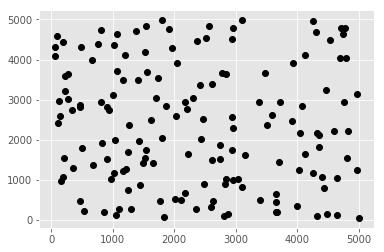

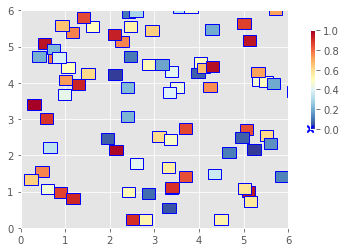

[[1001 22.139997 -100.978803 ... 0 0 0]
 [1002 22.150087 -100.983325 ... 0 0 0]
 [1003 22.119847 -100.946527 ... 0 0 0]
 ...
 [1136 22.149607 -100.997235 ... 0 0 0]
 [1137 22.144803 -100.94462299999999 ... 0 0 0]
 [1138 22.152884 -100.939663 ... 0 0 0]]


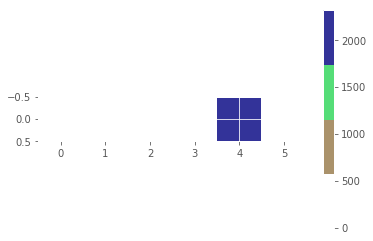

[[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [53]:
from neupy import algorithms, utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colorbar as cbar

utils.reproducible()
plt.style.use('ggplot')
arar=lshs
# [
#     [0.1961, 0.9806],
#     [-0.1961, 0.9806],
#     [0.9806, 0.1961],
#     [0.9806, -0.1961],
#     [-0.5812, -0.8137],
#     [-0.8137, -0.5812],
# ]
# X=nmt
data=nmt
sofmnet = algorithms.SOFM(
    n_inputs=2127,
    n_outputs=6,

    step=0.5,
    show_epoch=20,
    shuffle_data=True,
    verbose=True,

    learning_radius=0,
    features_grid=(6, 1),
)

plt.plot(X.T[0:11, :], X.T[1:12, :], 'ko')
sofmnet.train(X, epochs=100)

print("> Start plotting")


fig,ax=plt.subplots(1)
rng=6
plt.ylim(0,rng)
plt.xlim(0,rng)



normal = plt.Normalize(0,1) # my numbers from 0-1

cmap=plt.cm.RdYlBu_r
c=cmap(colors)

for i in range(N11):
    val=0.5
    rect=patches.Rectangle((x[i],y[i]),0.3,0.3,
                            edgecolor='blue',
                            linewidth = 1,
                            facecolor = c[i],
                            ) 
    ax.add_patch(rect)

cax, _ = cbar.make_axes(ax) 
cb2 = cbar.ColorbarBase(cax, cmap=cmap,norm=normal) 

plt.savefig("test.png")

plt.xlim(-1, 1.2)
plt.ylim(-1, 1.2)

plt.plot(sofmnet.weight[0:1, :], sofmnet.weight[1:2, :], 'bx')
plt.show()

print(data)

plt.imshow(sofmnet.weight[0:1, :], cmap=plt.cm.get_cmap('terrain_r', 4))
plt.colorbar()
plt.show()

xml=sofmnet.predict(np.reshape(data, (1, 16146 )).T)
print(xml)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!
SOFM(verbose=True, step=0.5, show_epoch=20, shuffle_data=True, signals=None, n_inputs=2127, n_outputs=6, weight=(2127, 6), features_grid=[6, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=0, std=1, reduce_radius_after=100, reduce_std_after=100, reduce_step_after=100)


[[0,
  1,
  3,
  4,
  5,
  7,
  8,
  13,
  17,
  24,
  34,
  39,
  44,
  45,
  46,
  47,
  49,
  51,
  52,
  54,
  56,
  57,
  59,
  63,
  64,
  66,
  67,
  68,
  71,
  73,
  74,
  79,
  84,
  87,
  89,
  90,
  93,
  95,
  99,
  110,
  111,
  112,
  114,
  118,
  120,
  124,
  125,
  126,
  127,
  128,
  132,
  134,
  136],
 [2,
  6,
  10,
  15,
  16,
  18,
  26,
  28,
  29,
  30,
  31,
  32,
  33,
  36,
  37,
  40,
  50,
  53,
  58,
  60,
  62,
  65,
  96,
  97,
  98,
  100,
  103,
  104,
  105,
  108,
  113,
  115,
  116,
  117,
  122,
  130],
 [11,
  19,
  20,
  21,
  22,
  25,
  27,
  35,
  42,
  55,
  69,
  75,
  76,
  77,
  78,
  80,
  81,
  82,
  83,
  85,
  86,
  88,
  91,
  92,
  94,
  102],
 [9,
  12,
  23,
  38,
  41,
  48,
  61,
  70,
  101,
  106,
  109,
  119,
  121,
  123,
  129,
  131,
  133,
  135,
  137],
 [14],
 [43],
 [72],
 [107]]

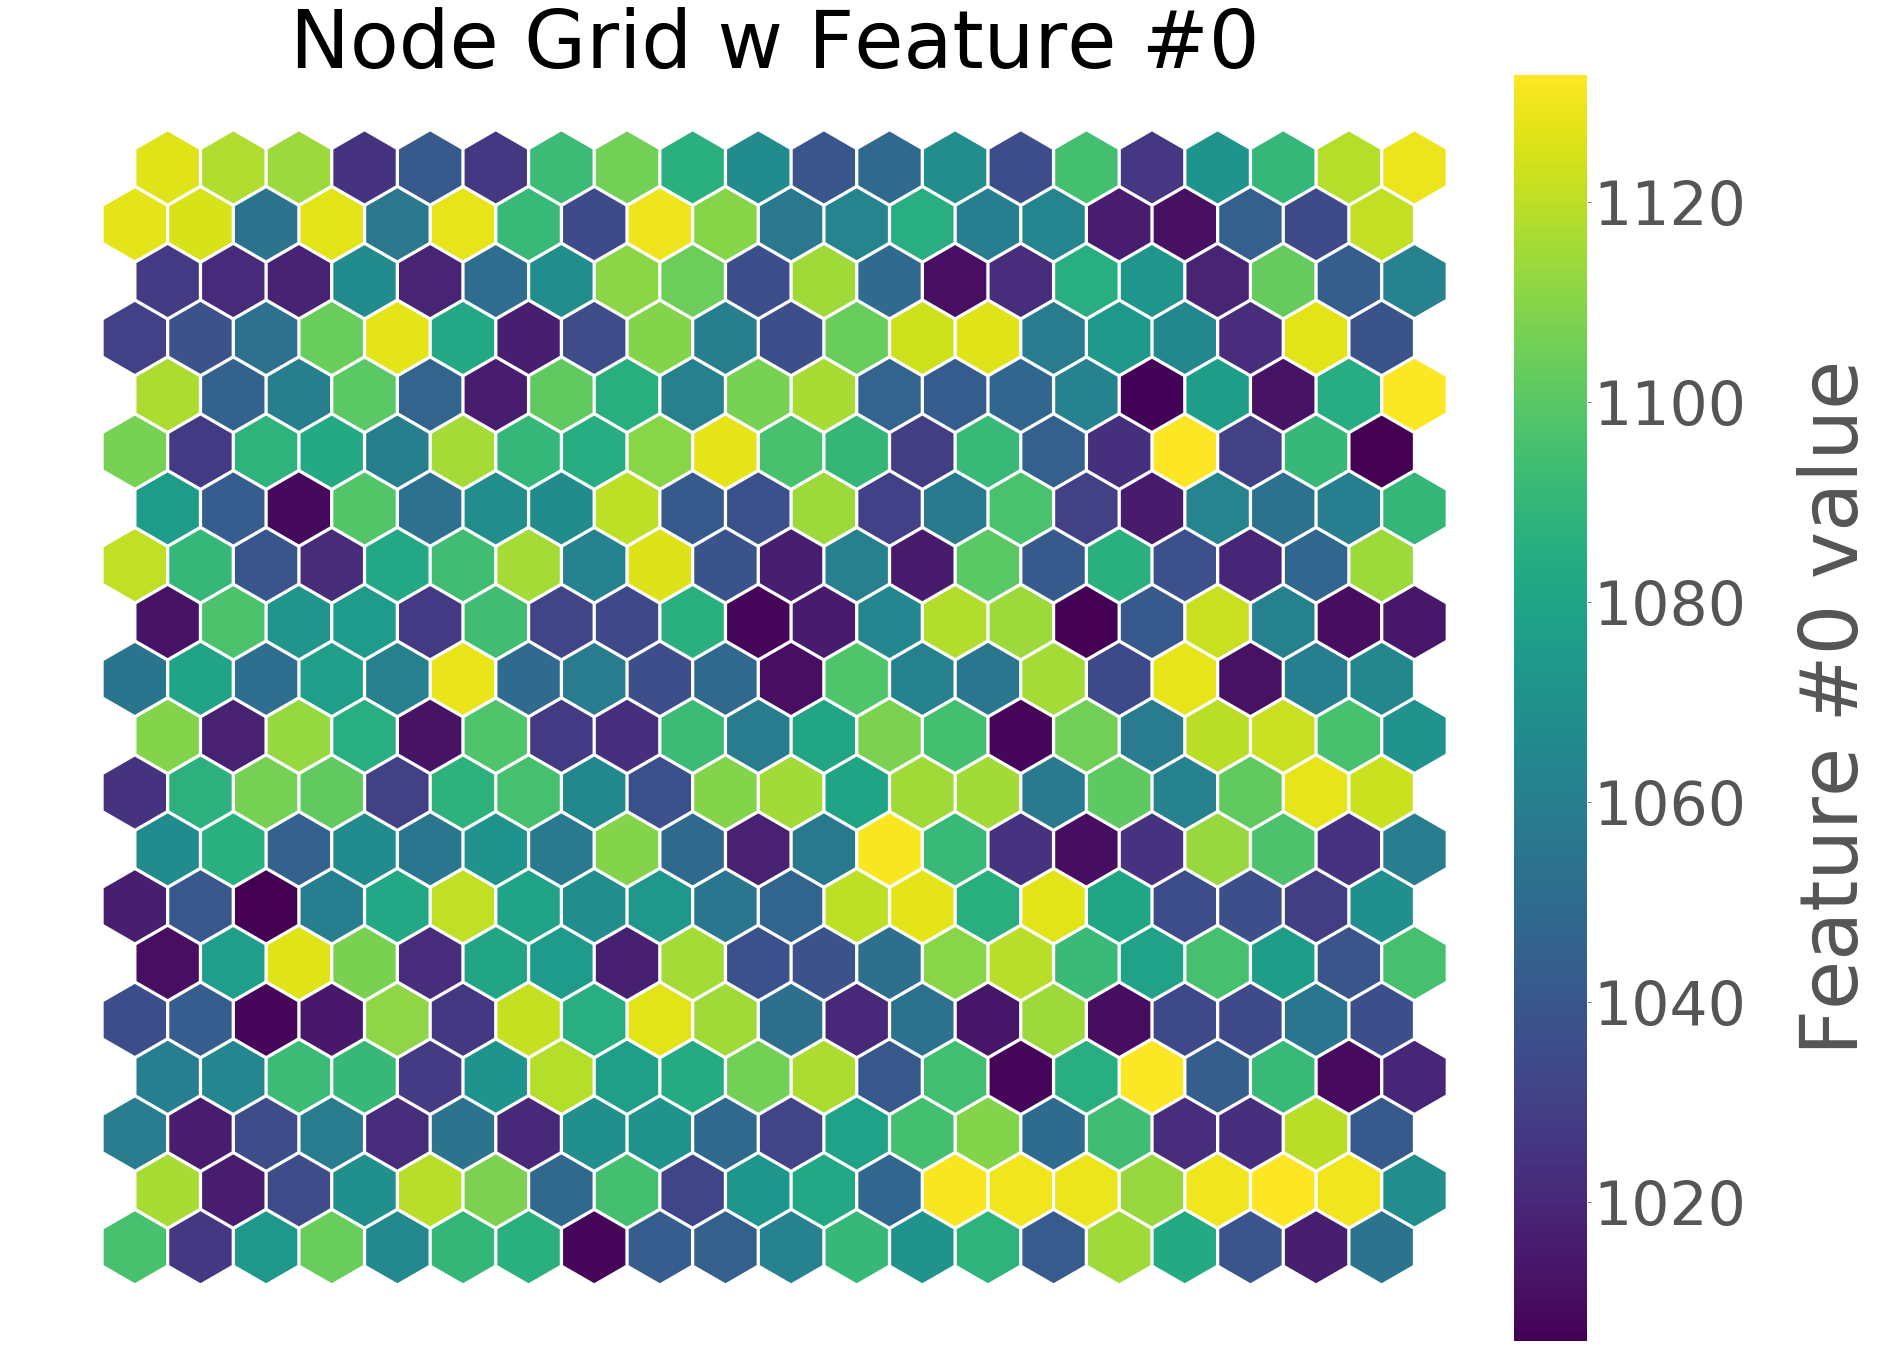

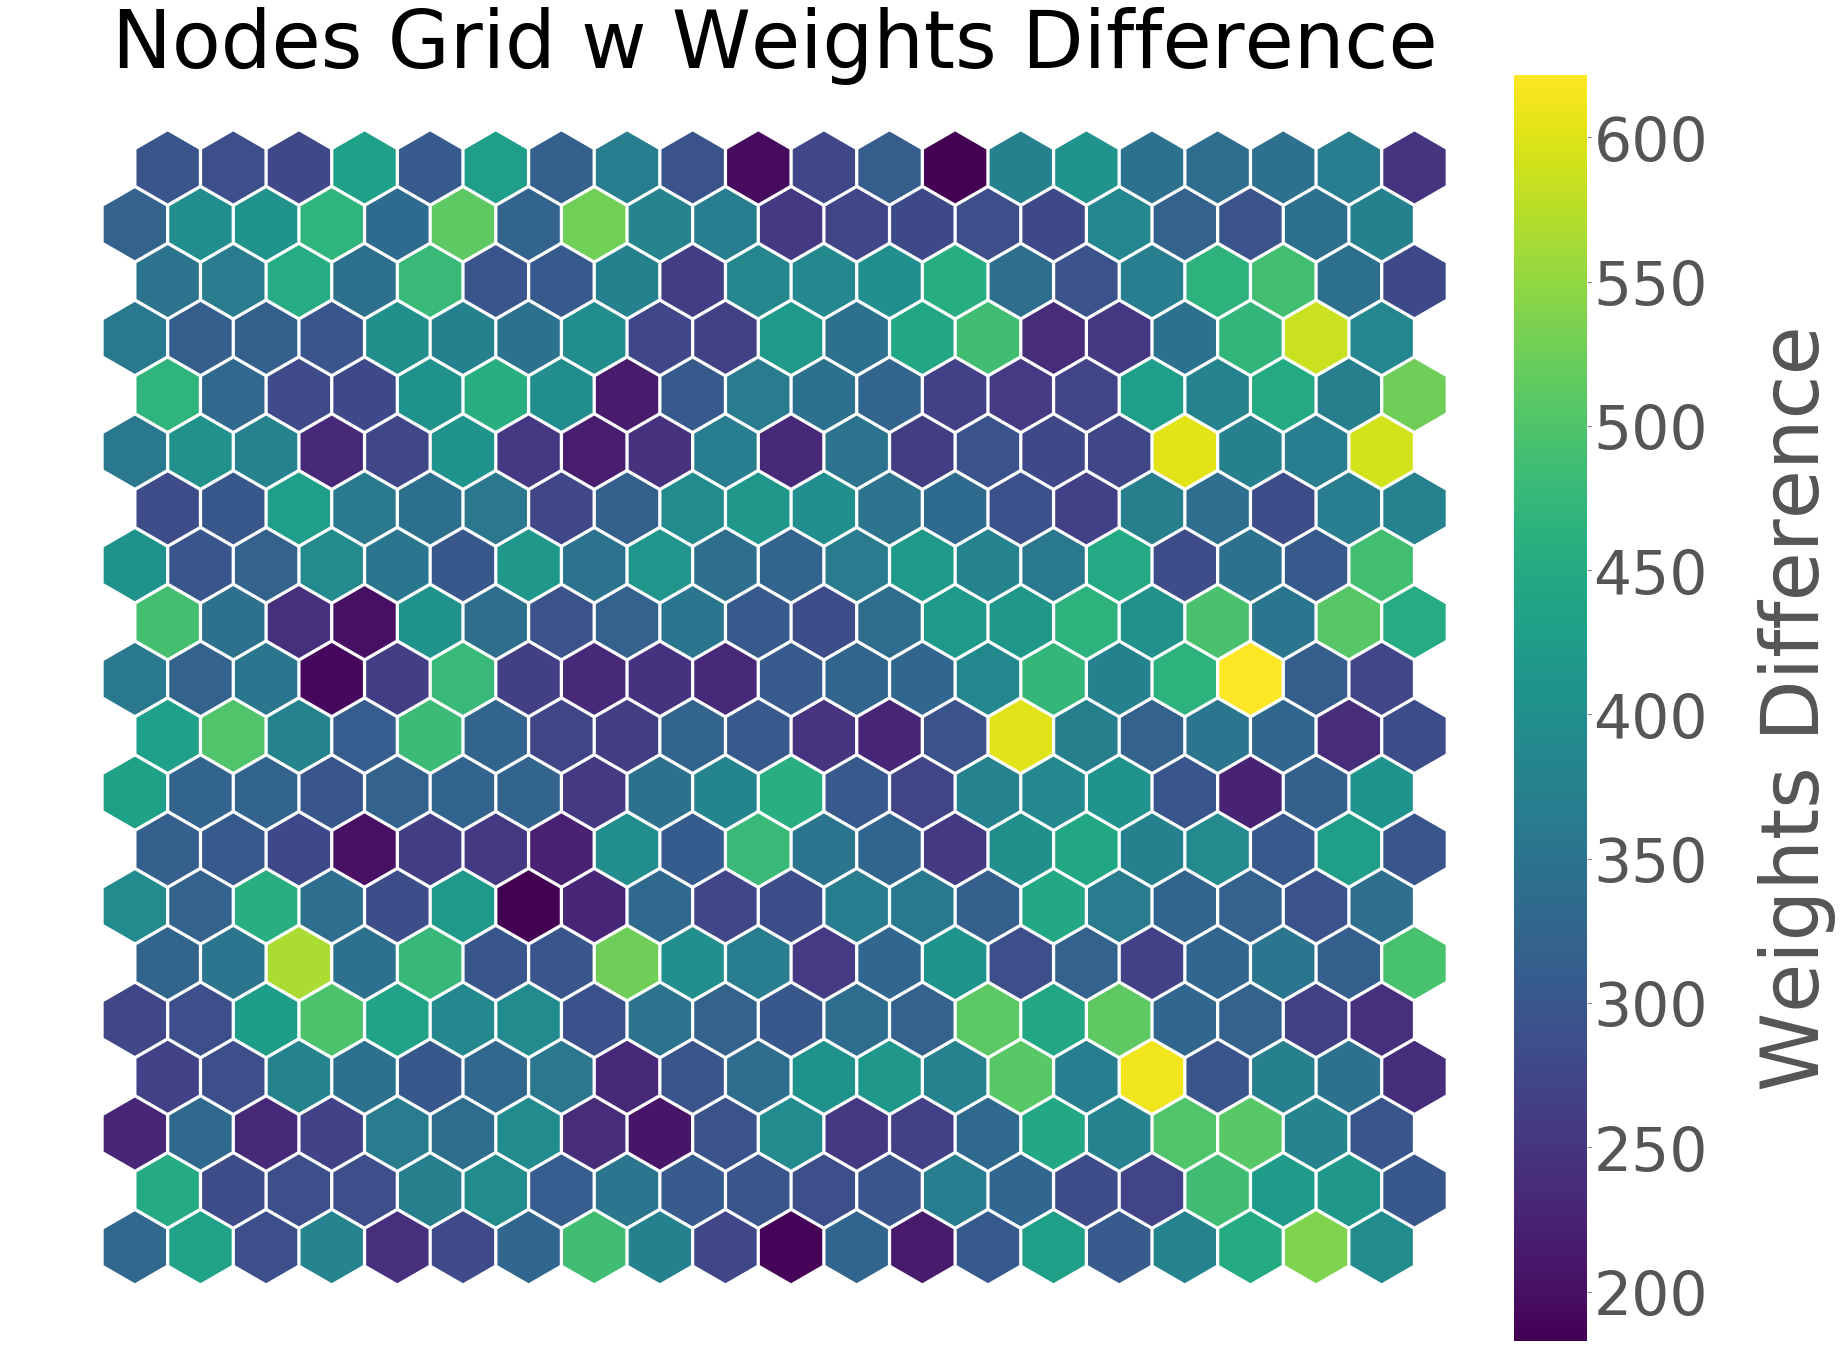

In [57]:

# diff_graph
# 	plot a 2D map with nodes and weights difference among neighbouring nodes	
# nodes_graph
# 	plot a 2D map with hexagonal nodes and weights values	
# project
# 	project the datapoint of a given array to the 2D space of the SOM by calculating the bmus.If requested plot a 2D map with as implemented 
# 	in nodes_graph and adds circles to the bmu of each datapoint in a given array
# cluster
# 	clusters the data in a given array according to the SOM trained map.the clusters
# 	can also be ploted
		

import SimpSOM as sps
raw_data=nmt

net = sps.somNet(20, 20, nmt, PBC=True)
labels=["userID","latitude","longitude","smoker","drink_level","transport","marital_status","birth_year","interest","personality"]

net.train(0.01, 40)

net.save('filename_weights')
print(sofmnet)

net.nodes_graph(colnum=0)
net.diff_graph()

net.project(raw_data, labels=labels)

net.cluster(raw_data, type='qthresh')	


In [ ]:
ls1=[]
ls2=[]
ls3=[]
ls4=[]
ls5=[]
ls6=[]
ls7=[]
ls8=[]
ls9=[]
ls10=[]
ls11=[]
ls12=[]
ls13=[]
lsn = {}
j=0
rs1=list(cluster_map['userID']);
# for i in cluster_map['cluster']:
#     if i in lsn:
#         lsn[i].append(rs[j])
#     else:
#         lsn[i] = [rs[j]]
#     j += 1

for i in cluster_map['cluster']:
    if(i==1):
        ls1.append(rs1[j]);
    if(i==2):
        ls2.append(rs1[j]);
    if(i==3):
        ls3.append(rs1[j]);
    if(i==4):
        ls4.append(rs1[j]);
    if(i==5):
        ls5.append(rs1[j]);
    if(i==6):
        ls6.append(rs1[j]);
    if(i==7):
        ls7.append(rs1[j]);
    if(i==8):
        ls8.append(rs1[j]);
    if(i==9):
        ls9.append(rs1[j]);
    if(i==10):
        ls10.append(rs1[j]);
    if(i==11):
        ls11.append(rs1[j]);
    if(i==12):
        ls12.append(rs1[j]);
    if(i==13):
        ls13.append(rs1[j])
        
    j=j+1;
k=0    

print(ls5)


In [ ]:
rs1=list(rating_final_df['userID'])
rs=list(rating_final_df['placeID'])
js=list(rating_final_df['rating'])
lsn={}
lsn[rs1[0]]={str(rs[0]):js[0]}
kr=0
for i in rs1:
    lsn[i]={str(rs[kr]):js[kr]}
    kr=kr+1


lsn


In [ ]:
rs=list(rating_final_df['placeID'])
rs1=list(rating_final_df['userID'])
lsn={}
k=0

for i in rs:
    if i in lsn:
        lsn[i].append(rs1[k])
    else:
        lsn[i]=[rs1[k]]
    k=k+1
lsn


In [ ]:
rs11=list(rating_final_df['placeID'])
rs111=list(rating_final_df['rating'])
lsn1={}
k1=0
for i in rs11:
    if i in lsn1:
        lsn1[i].append(rs111[k1])
    else:
        lsn1[i]=[rs111[k1]]
    k1=k1+1
lsn1


In [ ]:
rsts={}
for i in lsn1:
    if(i in rsts):
        rsts[i].append(sum(lsn1[i])/len(lsn1[i]));
    else:
        rsts[i]=[sum(lsn1[i])/len(lsn1[i])];
rsts


In [ ]:
def ratingofall(lists):
    rat1=[]
    jj=0
    r1=list(rating_final_df['userID'])   
    rt=list(rating_final_df['rating'])
    for i in lists:
        if(i in r1):
            rat1.append(rt[jj])
        jj=jj+1
    return rat1

rat1=ratingofall(ls1);
rat2=ratingofall(ls2);
rat3=ratingofall(ls3);
rat4=ratingofall(ls4);
rat5=ratingofall(ls5);
# rat6=ratingofall(ls6);
# rat7=ratingofall(ls7);
# rat8=ratingofall(ls8);
# rat9=ratingofall(ls9);
# rat10=ratingofall(ls10);
# rat11=ratingofall(ls11);
# rat12=ratingofall(ls12);
# rat13=ratingofall(ls13);

rats={}
rat11=float(sum(rat1)/len(rat1));
rat22=float(sum(rat2)/len(rat2));
rat33=float(sum(rat3)/len(rat3));
rat44=float(sum(rat4)/len(rat4));
rat55=float(sum(rat5)/len(rat5));
# rat66=float(sum(rat6)/len(rat6));
# rat77=float(sum(rat7)/len(rat7));
# rat88=float(sum(rat8)/len(rat8));
# rat99=float(sum(rat9)/len(rat9));
# rat100=float(sum(rat10)/len(rat10));
# rat111=1.0
# rat112=float(sum(rat12)/len(rat12));
# rat113=0.0

ratings=[rat11,rat22,rat33,rat44,rat55]

for i in range(1,6):
    rats[i]=ratings[i-1]
    
final=sorted(rats.items(), key=lambda x: x[1])
final.reverse()
print("All Clusters based upon rating")
final



In [ ]:
from recommendations_data import datasets
from math import sqrt

In [ ]:
dataset=datasets

In [ ]:
dataset

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# from recommendations_list import recommendation_lists
# from recommendations_data import reclists
from test_data import tests
from train_data import trains
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

def similarity_score(person1,person2):
    both_viewed = {}
    for item in dataset[person1]:
        if item in dataset[person2]:
            both_viewed[item] = 1

        # Conditions to check they both have an common rating items	
        if len(both_viewed) == 0:
            return 0

        # Finding Euclidean distance 
        sum_of_eclidean_distance = []

        for item in dataset[person1]:
            if item in dataset[person2]:
                sum_of_eclidean_distance.append(pow(dataset[person1][item] - dataset[person2][item],2))
        sum_of_eclidean_distance = sum(sum_of_eclidean_distance)

        return 1/(1+sqrt(sum_of_eclidean_distance))

#pearsons corellation for finding how strong relationship between two variables using corelation coffieicents r =-1 to +1 

def pearson_correlation(person1,person2):
    both_rated = {}
    for item in dataset[person1]:
        if item in dataset[person2]:
            both_rated[item] = 1

    number_of_ratings = len(both_rated)	
    if number_of_ratings == 0:
        return 0

    person1_preferences_sum = sum([dataset[person1][item] for item in both_rated])
    person2_preferences_sum = sum([dataset[person2][item] for item in both_rated])

    # Sum up the squares of preferences of each user
    person1_square_preferences_sum = sum([pow(dataset[person1][item],2) for item in both_rated])
    person2_square_preferences_sum = sum([pow(dataset[person2][item],2) for item in both_rated])

  
    product_sum_of_both_users = sum([dataset[person1][item] * dataset[person2][item] for item in both_rated])

    numerator_value = product_sum_of_both_users - (person1_preferences_sum*person2_preferences_sum/number_of_ratings)
    denominator_value = sqrt((person1_square_preferences_sum - pow(person1_preferences_sum,2)/number_of_ratings) * (person2_square_preferences_sum -pow(person2_preferences_sum,2)/number_of_ratings))
    if denominator_value == 0:
        return 0
    else:
        r = numerator_value/denominator_valueT
        return abs(r)

    
    
    
    
def most_similar_users(person,number_of_users):
    scores = [(pearson_correlation(person,other_person),other_person) for other_person in dataset if  other_person != person ]
    scores.sort()
    scores.reverse()
    return scores[0:number_of_users]



def user_reommendations(person):
    totals = {}
    simSums = {}
    sim =[]
    for other in dataset:
        if other == person:
            continue
        sim = pearson_correlation(person,other)
        
        if sim <=0: 
            continue
        for item in dataset[other]:
            if item not in dataset[person] or dataset[person][item] == 0:
                totals.setdefault(item,0)
#                 print("Sim",sim,person,other)
                totals[item] += dataset[other][item]* sim
                simSums.setdefault(item,0)
                simSums[item]+= sim            

    rankings = [(total/simSums[item],item) for item,total in totals.items()]
    rankings.sort()
    
    rankings.reverse()
#     print("rankings", rankings)
    recommendation_list = [recommend_item for score,recommend_item in rankings]
    
    return recommendation_list


print("SIMILARITY SCORES\n")
print(similarity_score('U1004','U1001'),"\n")
print("MOST SIMILAR USERS\n")
print(most_similar_users('U1002',3))
print("\nPEARSON_CORRELATION\n")
print(pearson_correlation('U1002','U1001'))
print("\nUSER Recommendation\n")
print(user_reommendations('U1002'))

def intersect(b1, b2):
    return list(set(b1).intersection(b2))

# user_reommendations('U1002')
# total = 0
# zero_count = 0
# for user in dataset:
#     result = user_reommendations(user)
#     if len(result) == 0:
#         zero_count += 1
#     else:
#         print(user, intersect(result, list(dataset[user].keys())))
#     total += 1
# print(zero_count, total)


In [ ]:
from collections import Counter

In [ ]:
def get_liked_places(user):
    return [place for place in dataset[user] if dataset[user][place] >= 2]


def calculate_recall(user):
    liked_places = get_liked_places(user)
    predicted_places = user_reommendations(user)
    if len(liked_places) == 0:
        return 0.0
    else:
        return len(intersect(liked_places, predicted_places)) / len(liked_places)

def calculate_precision(user, liked_places_count):
    predicted_places = user_reommendations(user)
    if len(predicted_places) == 0:
        return 0.0
    else:
        return liked_places_count / len(predicted_places)

def avgreprecision(dataset):
    avg_precision_sum=0;
    j=0;
    for user in dataset:
        avg_precision_sum+= calculate_precision(user,.2);
        j=j+1
    avg_precision=float(avg_precision_sum/(len(user)))
    return avg_precisions

def avgrecall(dataset):
    avg_recall_sum=0;
    for user in dataset:
        avg_recall_sum+= calculate_recall(user);
    avg_recall=float(avg_recall_sum/(len(user)))
    return avg_recalls

def calculate_mean_average_precision(recalls):
    d = dict(Counter(recalls))
    avg = 0
    n = len(recalls)
    for recall in d:
        avg += d[recall] / n
    return avgs

def list_of_precision(tests):
    prelist=[]
    for user in tests:
        prelist.append(calculate_precision(user,3));
        
def list_of_recall(tests):
    reclist=[]
    for user in tests:
        reclist.append(calculate_recalls(user));
    return reclist;

In [ ]:
print("ALL Test Data")
for i in tests:
        print(i,tests.values())

In [ ]:

avg_recall=avgrecall(tests)
avg_recall


In [ ]:

avg_precision=avgreprecision(tests)
avg_precision


In [ ]:
prelist=[]
reclist=calculate_recall(user);

# cal_pre_re()
for user in dataset:
        prelist.append(calculate_precision(user,3));


In [ ]:
print("List of Precision of Every User ")
for i in range(len(prelist)):
    if(i==20):
        break;
    else:
        print(prelist[i])

In [ ]:

cal_m_a_p=calculate_mean_average_precision(prelist)

In [ ]:
print("Mean Average Precision=",cal_m_a_p)

In [ ]:
from sklearn.model_selection import train_test_split
columns=['userID','placeID','rating','food_rating', 'service_rating']
df = pd.DataFrame(rating_final_df,columns=columns)
df.drop(['food_rating', 'service_rating'], axis=1)
df.head()



In [ ]:
datasets

In [ ]:
cluster_map.head()

#Check for null value
geoplaces2_df.isnull().sum()

In [ ]:
geoplaces2_df.shape


In [ ]:
geoplaces2_df.head(1)

In [ ]:
for col in geoplaces2_df.columns:
    if geoplaces2_df[col].dtype == object:         
            print(col, (geoplaces2_df[col].str.contains('\?') == True).sum()) 

In [ ]:
columns_with_na_vals= ['address','city','state','country','fax','zip','url']

In [ ]:
for col in columns_with_na_vals:
    geoplaces2_df[col] = (geoplaces2_df[col].replace({'?': np.NaN})) 

In [ ]:
geoplaces2_df.head()

In [ ]:

geoplaces2_df

#### Concatenate All restaurent file together of common column placeID

In [ ]:
restaurant_all = np.concatenate((chefmozaccepts_df.placeID, chefmozcuisine_df.placeID, chefmozhours4_df.placeID, chefmozparking_df.placeID, geoplaces2_df.placeID))
restaurant_all = np.sort(np.unique(restaurant_all) ) # All the unique placeID's
print(len(restaurant_all))

In [ ]:
restaurant_all

Note: Here we concatenate all restaurant files according to their placeID, it will give all common placeID which is present in all five .csv file. Finally, we get total 938 placeID which is unique.

### Explore the user item rating files
#### rating_final.csv 

In [ ]:
rating_final_df.columns

In [ ]:
rating_final_df.info()

In [ ]:
rating_final_df.shape

In [ ]:
rating_final_df.isnull().sum()

In [ ]:
rating_final_df[['rating','food_rating','service_rating']].describe()

In [ ]:
rating_final_df.head()

In [ ]:
len(rating_final_df.placeID.unique())

In [ ]:
# Select k points at random as cluster centers. Assign objects to their closest cluster center according to the Euclidean distance function. Calculate the centroid or mean of all objects in each cluster. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.
# It does not behave so gently when using categorical data, even worse for mixed types data.
# The time for preparing model is slow, hard to train against slowly evolving data


In [ ]:
# Recall:
# What ratio of items that a user likes were actually recommended.
# If a user likes say 5 items and the recommendation decided to show 3 of them, then the recall is 0.6
# Precision
# Out of all the recommended items, how many the user actually liked?
# If 5 items were recommended to the user out of which he liked say 4 of them, then precision is 0.8